# Test EV control error

After test the EV control error, there is always a gap between the EV actual response power and the estiamted response power.

Now I think the error is inevitable, because the EV SSM has such drawback.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ev_ssm import ev_ssm
from ev_ssm import r_agc_sev
from tqdm import tqdm

In [2]:
# # --- Control Error ---
# Pil = []
# Prl = []
# Pcl = []
# error = []
# t0 = 10.8
# for Pi in np.arange(0.5, 8, 0.2):
#         sse = ev_ssm(ts=t0, N=10000, step=1, tp=40,
#                 lr=0.1, lp=40, seed=2022, name="EVA")
#         sse.load_A("Aest.csv")

#         c0 = sse.ev.c
#         sse.run(tf=t0 + 1.5/3600, Pi=Pi,
#                 is_updateA=False, is_rstate=True,
#                 is_test=False, disable=False)

#         [u, v, us, vs] = sse.uv
#         [A, B, C, D] = [sse.A, sse.B, sse.C, sse.D]

#         Pil.append(Pi)
#         Prl.append(sse.Pr)
#         Pcl.append(sse.Prc)
#         error.append((sse.Prc - sse.Pr) / sse.Pr)

In [3]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.plot(Pil, Prl, label="Signal")
# ax.plot(Pil, Pcl, label="Response")
# ax.set_xlabel("Input power [p.u.]")
# ax.set_ylabel("Output power [p.u.]")
# ax.set_title(f"Time={sse.tss[0]} [H]")
# ax.set_xlim([0.5, 7.7])
# ax.grid(True)
# ax.legend()
# ax2 = ax.twinx()
# ax2.plot(Pil, error, label='Error', color='red')

In [4]:
# sse.ev[sse.ev.agc != 0].shape

In [5]:
# sse.ev[sse.ev.u == 1].shape

In [6]:
# sse.ev[(sse.ev.c0 != sse.ev.c) & (sse.ev.u==1)][['c0', 'c', 'sx']]

In [7]:
# --- Single Response ---

Pi = 9
t0 = 10.4

sse = ev_ssm(ts=t0, N=10000, step=1, tp=40,
        lr=0.1, lp=40, seed=2022, name="EVA")
sse.load_A("Aest.csv")

r0 = sse.rtab.values.reshape(-1)
x0 = sse.x0
sse.run(tf=t0 + 1.5/3600, Pi=Pi,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=True)
r = sse.rtab.values.reshape(-1)
x = sse.x0

[u, v, us, vs] = sse.uv
[A, B, C, D] = [sse.A, sse.B, sse.C, sse.D]

print(sse.Pr)
print(sse.Prc)
print(sse.Prc - sse.Pr)

EVA: ts=10.4[H], 10000 EVs, Total Q=250.12 MWh
Online 1806, Q=45.34 MWh, SoC=0.9764
Power(MW): Pt=-0.4726, Pc=-0.4726, Pd=-0.0
Ctrl: 0=1727; 1=79; 
EVA: Load A from Aest.csv.


9.0
9.375636431517687
0.37563643151768744


In [8]:
# --- Replay ---
# Replay EV control signal from recorded data
# Replay 1 hour data may need 0.5 hour
# Replay is not accurate

sse_out = pd.read_csv('sse_out.csv')
sse_out_s = sse_out.iloc[1400:1600].reset_index(drop=True)

t0 = sse_out_s['time'].iloc[0]
sse = ev_ssm(ts=t0, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA")
sse.load_A("Aest.csv")

ev_soc = pd.DataFrame(columns=range(sse_out_s.shape[0]))
ev_agc = pd.DataFrame(columns=range(sse_out_s.shape[0]))

for row in tqdm(range(sse_out_s.shape[0]), desc=f'{sse.name} Replay'):
    sse.run(tf=sse_out_s.time.iloc[row], Pi=sse_out_s.Pr.iloc[row],
            is_updateA=False, is_rstate=True,
            is_test=False, disable=True)
    ev_soc[row] = sse.ev.soc
    ev_agc[row] = sse.ev.agc

EVA: ts=10.3889[H], 10000 EVs, Total Q=250.12 MWh
Online 1813, Q=45.51 MWh, SoC=0.9772
Power(MW): Pt=-0.4601, Pc=-0.4601, Pd=-0.0
Ctrl: 0=1736; 1=77; 
EVA: Load A from Aest.csv.
EVA Replay: 100%|██████████| 200/200 [00:55<00:00,  3.59it/s]


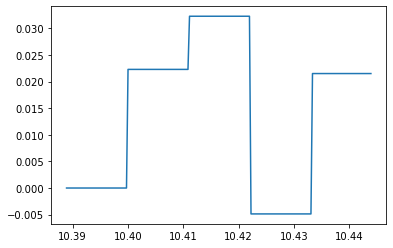

In [9]:
plt.plot(sse.tss, sse.Perl)

(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [H]', ylabel='Power (MW)'>)

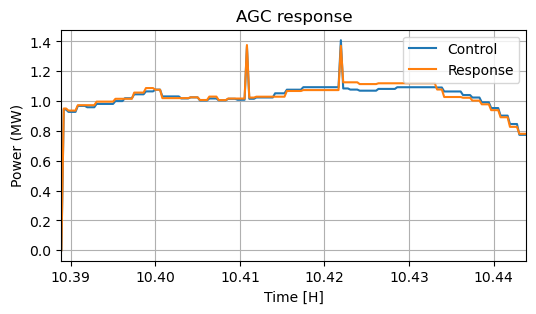

In [10]:
sse.plot_agc()

(<Figure size 600x300 with 2 Axes>,
 <AxesSubplot:title={'center':'EVA'}, xlabel='Time [H]', ylabel='Power (MW)'>)

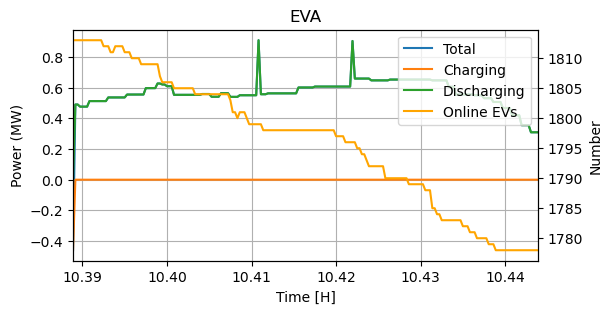

In [11]:
sse.plot()